Test files at: test_data/redaction_examples

1. GE Revolution CT
    * Redaction Zone: [20, 70, 20, 500]
2. Siemens Somatom Force
    * Redaction Zone: [450, 500, 400, 512]
3. Philips Brilliance 64
    * Redaction Zone: [10, 60, 200, 512]

In [ ]:
%pip install pydicom matplotlib

In [ ]:
%pip install --force-reinstall "git+https://github.com/kvnlng/Gantry.git"

In [1]:
import pydicom
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
filename = "redaction_examples/Subject_PID-10291/Study_20260115_Study/Series_1_Series/0001.dcm"

ds = pydicom.dcmread(filename)

print(f"Patient's Name...: {ds.PatientName}")
print(f"Modality.........: {ds.Modality}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")

# Manufacturer
print(f"Make:  {ds.Manufacturer}")
# Model Name
print(f"Model: {ds.ManufacturerModelName}")
# Serial Number
print(f"Serial: {ds.DeviceSerialNumber}")

Patient's Name...: Smith^Dennis
Modality.........: CT
Image size.......: 512 x 512
Make:  GE
Model: Revolution CT
Serial: SN-7750


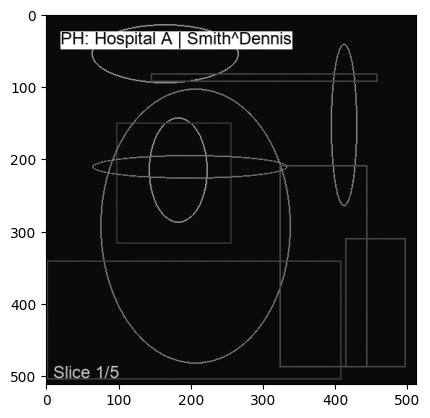

In [3]:
# Display the first frame
plt.imshow(ds.pixel_array[0], cmap=cm.gray)

In [4]:
from gantry import Session
session = Session("redaction.db")

Loading session from redaction.db...
Loaded session from redaction.db


In [5]:
session.ingest("redaction_examples")
session.save()

Ingesting from 'redaction_examples'...


Ingesting: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.31it/s]


Ingestion Complete.
Summary:
  - 6 Patients
  - 6 Studies
  - 6 Series
  - 18 Instances
Remember to call .save() to persist changes.



In [6]:
# Print a summary of the cohort and equipment
session.examine()


Inventory Summary:
 Patients:  6
 Studies:   6
 Series:    6
 Instances: 18

Equipment Inventory:
 - GE - Revolution CT (Count: 2)
 - Philips - Brilliance 64 (Count: 2)
 - Siemens - Somatom Force (Count: 2)


In [7]:
# Create a default configuration file
# session.create_config("redaction-config.yaml")

In [8]:
# Load the configuration (rules, tags, jitter)
session.load_config("redaction-config.yaml")

Loading configuration from redaction-config.yaml...
Configuration Loaded:
 - 6 Machine Redaction Rules
 - 29 PHI Tags
 - Date Jitter: -365 to -1 days
 - Remove Private Tags: True
Tip: Run .audit() to check PHI, or .redact_pixels() to apply redaction.


In [9]:
session.redact()

Queued 18 redaction tasks across 6 rules.
Executing using 7 threads...


Redacting Pixels: 100%|███████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 1176.94it/s]

Execution Complete. Remember to call .save() to persist.
Execution Complete. Session saved.


In [10]:
session.export("redacted_dicoms", safe=False, compression="j2k")

Preparing for export (saving & releasing memory)...


Releasing Memory: 100%|████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 136277.03img/s]

Memory Cleanup: Released 18 images from RAM.
Exporting...



Exporting: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 54.16it/s]

Done.


In [11]:
redacted_filename = "redacted_dicoms/Subject_PID-10291/Study_2026-01-15_Study/Series_1_Series/1.2.826.0.1.3680043.8.498.24093535833526280036728022625281262211.dcm"

redacted_ds = pydicom.dcmread(redacted_filename)

print(f"Patient's Name...: {redacted_ds.PatientName}")
print(f"Modality.........: {redacted_ds.Modality}")
print(f"Image size.......: {redacted_ds.Rows} x {redacted_ds.Columns}")

# Manufacturer (e.g., "GE Medical Systems", "SIEMENS")
print(f"Make:  {redacted_ds.Manufacturer}")
# Model Name (e.g., "Revolution CT", "Somatom Force")
print(f"Model: {redacted_ds.ManufacturerModelName}")
# Serial Number
print(f"Serial: {redacted_ds.DeviceSerialNumber}")

Patient's Name...: Smith^Dennis
Modality.........: CT
Image size.......: 512 x 512
Make:  GE
Model: Revolution CT
Serial: SN-7750


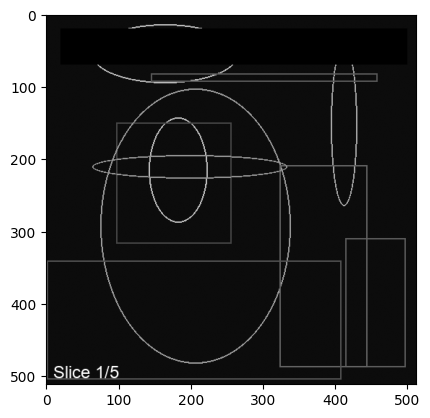

In [12]:
# Display the first frame
plt.imshow(redacted_ds.pixel_array[0], cmap=cm.gray)